# **I.Pourquoi ce projet ? **

Ce projet est né notamment dans le but de créer une IA environnementale. **Grégoire** avait eu l'idée, et l'avait même proposer en projet à notre **responsable de master**.

Ainsi, le but est de remplir un vide en matière d'IA, à savoir que **peu d'IA** conseillent sur les gestes écologiques du quotidien.

De plus, nos  buts grâce à cette IA, est d'augmenter **la consommation de produits locaux** :
-un : renforcer la consommation locale, et donc de circuit-court en résumant de façon efficace les informations : qui quoi, quoi  ;
2. **Permettre une comparaison facile et accessible avec le non-bio en termes économiques** , en prenant comme points de comparaison un magasin non bio comme Leclerc
3. **Renforcer les achats de produits locaux**/bios parmi les populations plus populaires, en tentant de calculer les coûts liés à chaque panier s'ils ne sont pas présent ;
4. **Tenter de renforcer la conscience écologique et la rationalité écologique** : en conseillant, nous pouvons donc avoir des suggestions qui permettront de **changer nos comportements sociaux et économiques, comme à l'école ou lors de nos achats. **
5. Permettre de le **rendre directement** utilisable le plus possible.**et permettre une certaine liberté à l'utilisateur**.


**CL : Montrer l'utilité de l'IA pour l'aide à la décision en faveur de l'impact social et environnemental à titre occasionnel**.

A noter, il est important de souligner qu'utiliser l'IA pour l'écologie est également un peu paradoxal : une requête d'IA utilise en moyenne dix fois plus d'énergie qu'une requête Google. Ainsi, il est important pour nous que cette IA puisse plus conseiller, et améliorer la prise de décision, afin que son usage soit intéressant en comparaison d'une recherche Google.

I. Création de la base de données
:THOMAS
+CODE :

A noté,

II. Un pélerinage en IA :Essais fructueux avec  Mistral ,moins fructueux lors de l'entraînement sur des données spécifiques. :
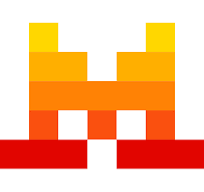![image.png](
  

)

Mistral avait été le premier choix. En effet, il était présenté comme plus léger que les autres modèles tout en étant français.**Ainsi un premier projet s'était concentré dessus**, et marchait pour les questions ; mais pas du tout pour l'entraîné (trop de ram...).


En étant donc assez optimiste, on a testé...et cela marchait plutôt bien pour des questions générales, ne nécessitant pas de l'entraîner. Il tournait plutôt bien sur colab.

Or entraîner un modèle, c'est aussi mobilisé plus de RAM du GPU.  Entraîner un modèle d'IA signifie notamment qu'on va l'entraîner à être plus précis sur une base de donnée définie.
De plus, on avait fait attention à **diminuer au maximum la RAM, avec du Low rank, càdire l'entraînement d'une partie des hyperparamètres à la place de la totalité, et l'utilisation d'un modèle avec une quantification de 4 bits.**

Toutefois, de nombreuses erreurs GPU sont apparues, en raison d'une quantité de RAM trop importante qui a été utilisée. Ainsi, il n'y avait aucun résultat qui s'affichait, et Google Colab nous déconnectait régulièrement pour trop utiliser leurs serveurs.

# **II.La recherche de nouvelles manières au delà du LoRank ou des hyperparamètres d'améliorer nos résultats : quantification, Instruct et DPO**

# **Partie 1 : pré-requis **


# Pré-requis liés aux LLMs.

1.Collab (présent en Readme aussi)

2.Fichier  JSON de Webscrapping **automatiquement** chargé à partir de Drive ou github.

De facto, il apparaît nécessaire de connecter ce code **au GPU T4**, de Collab afin que cela marche.

**1.Cliquez à côté de l'endroit de la RAM sur Collab **
**2. Modifier le type d'exécution **
**3. Cocher GPU T4**
**Sinon ce script ne peut fonctionner car on a besoin d'un GPU à part afin d'effectuer les calculs du LLM**.

Quand on développe une intelligence artificielle qui conseille des gens sur des produits disponibles près de chez eux, on peut vouloir utiliser un modèle de langage comme LLaMA pour bien comprendre les besoins des utilisateurs et générer des réponses naturelles.

Mais ces modèles sont **très gros**. Par exemple, LLaMA 7B a 7 milliards de paramètres. Ça demande pas mal de ressources.


Les modèles comme LLaMA sont très puissants, mais aussi très gros. Même la version “petite”, LLaMA 7B, a 7 milliards de paramètres. Ça demande beaucoup de mémoire et de calculs pour fonctionner. Impossible de faire tourner ça sur un ordi classique.

C’est là qu’un GPU comme le NVIDIA T4 est super utile.

Le **T4 a 16 Go de mémoire**, ce qui est suffisant pour faire tourner une version compressée (quantisée) du modèle, par exemple LLaMA 7B en 4-bit. Il n’a pas besoin d’être aussi gros ou cher qu’un A100 ou H100.

**2. Un GPU T4 plus écologique**
Il utilise peu d’énergie (70W) contre **400 watts pour un A100**, ce qui le rend parfait pour des déploiements simples, en cloud ou en local.

Il est aussi optimisé pour les calculs IA grâce à ses Tensor Cores, qui accélèrent les opérations sur les matrices, très utilisées par les modèles de langage.

# 2.**Pré-requis de programmation**

I. Installer les packages

In [ ]:

!pip install -q -U bitsandbytes
!pip install -q -U transformers  # Remove version restriction here
!pip install -q -U git+https://github.com/huggingface/peft.git
!pip install -q -U git+https://github.com/huggingface/accelerate.git
!pip install -q datasets
!pip install evaluate
!pip install -qqq trl==0.7.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 MB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 53.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 50.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 71.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml)

2. Charger les packages.

In [ ]:
import torch
import time
import evaluate
import pandas as pd
import numpy as np
from datasets import Dataset, load_dataset
import random

# 3. Importer directement depuis Google Drive.

In [ ]:
import requests
import json

# ID du fichier Google Drive
file_id = "1xl9bPoZ715I6dkiJz7NUtghms--eDmCy"
# URL de téléchargement directe (via Google Drive)
url = f"https://drive.google.com/uc?export=download&id={file_id}"

# Télécharger le fichier
response = requests.get(url)
response.raise_for_status()  # en cas d'erreur

# Charger le contenu JSON
data = json.loads(response.text)

# Convertir en DataFrame
df = pd.DataFrame(data)

# Afficher les premières lignes
print(df.head())


                                                 url  \
0  https://www.reussir.fr/fruits-legumes/un-conce...   
1  https://www.dna.fr/politique/2025/01/15/un-vra...   
2  https://www.dna.fr/societe/2021/12/03/l-epicer...   
3  https://www.francebleu.fr/emissions/l-eco-d-ic...   
4  https://www.lespaniersdupetitlucien.fr/#inform...   

                                               texte  
0  Â« Un concept innovant pour Ã©couler mes produ...  
1  Gundershoffen Un vrai Ã©lan de solidaritÃ© pou...  
2  Gundershoffen Lâ€™Ã©picerie sociale ne connaÃ®...  
3  Solibio, la coopÃ©rative grossiste alsacienne ...  
4  Vos questions, nos rÃ©ponses.\n------ Panier C...  


# **1ere méthode : Quantifier mais aussi savoir paramétrer (présent en annexe des diapos) **

I. Choix du modèle: dans quelle mesure est-il important d'utiliser **un LLM** qu'on entraîne nous même et non une API ?

La réponse est simple : la possibilité de paramétrer, afin d'influencer comme on le souhaite la réponse donnée. D'un autre côté, cela permet d'éviter **d'être dépendant des paramétrages initiaux**, qui sont parfois fortement orientées, même politiquement, comme ** ceux de Grok**( sauf rébellion).

**Meta (Facebook)** a créé **OPT**, une série de modèles de langage (transformers) allant de 125 millions à 175 milliards de paramètres.
Ils sont conçus pour ressembler à **GPT-3**, en termes de taille et de performance.
Il est sorti en **2022**.

**Pourquoi cette appellation OPT ?**
En effet, cette appellation existe en raison du caractère **open-source** de l'OPT.

Nous présentons **Open Pretrained Transformers (OPT)**, une suite de transformateurs pré-entraînés, uniquement pour décodeur, avec des paramètres compris **entre 125 M et 175 B**, que nous souhaitons partager pleinement et de manière responsable avec les chercheurs intéressés

**Quel niveau de performance par rapport aux IA que tout le monde connaît ?**
Les performances des modèles **OPT**correspondent approximativement aux performances et aux tailles des modèles de la classe GPT-3 comme **Chat gpt3.5**, tout en appliquant les meilleures pratiques les plus récentes en matière de collecte de données et d'apprentissage efficace

**Quel est le but **social** et dans quelle mesure ce modèle a -t-il vocation a encouragé **le progrès social ** ? **
Cet accès restreint a limité la capacité des chercheurs à étudier le fonctionnement de ces grands modèles linguistiques, freinant ainsi les progrès visant à résoudre les problèmes connus tels que **la robustesse, les biais et la toxicité**.




**En résumé : pourquoi entraîner nous même un LLM ?**

 Ainsi, le choix **d'un modèle LLM à part, et non pré-configurer** nous apparaît intéressant de souligner l'envie de créer ** des modèles open-sources**, dans le but à ce qu'il existe ** une diversité de paramétrages**, comme la température qui permet  de **modifier la créativité du modèle**.
 Ces éléments sont la clé afin de créer des modes de **pensée différents**




2.**¨Pourquoi un modèle Facebook de 125M marche-t-il fonctionne-t-il alors que le Mistral fonctionnait un peu et le Llama (2023), version plus évoluée, ne fonctionnait pas ? **

1.OPT-125M est minuscule, **il est beaucoup plus petit que les 7 milliards de paramètres d'un Llama par exemple **.Ainsi, il est au final, pour donner un ordre de grandeur **50 fois plus petit**.
En conséquence, c'est beaucoup plus simple à entraîner !

2.**Le deuxième avantage est qu'on n'a pas besoinde **quantisé**.
**Quantisé signifie qu'on transforme un langage complexe de 16bits par exemple 8.0120304958 à du langage plus simpel comme du 4 bits, 8.0. Ensuite, on déquantifie la sortie pour tenter de la retraduire en 16 bits, qui est le langage inital.

En effet, lorsque j'ai fait tourner **Mistral**, on a réussit à le faire tourner mais pas à l'**entraîner**

Il ne fait que 125 millions de paramètres, c’est presque rien pour un LLM.En conséquence, **la quantification/simplification** du langage est **énorme**.

**Quels limites de cette méthode et de cette très petite taille de paramètre , que l'on peut donc constater **

Un modèle comme OPT-125M :

A une toute** petite "mémoire" du langage**.

Ne comprend pas bien** les contextes longs**.

Génère souvent des **réponses simplistes ou imprécises.**

**Toutefois, ces performances semblaient assez honorables, voire plus que Bert**.



# C. LLama , un modèle trop lourd en nombre de paramètres pour tourner sous Colab

Sous LLAMA, en structurant mieux le dataset , on réussit également à mieux finetuner le modèle, d'où cette petite partie qui permet égalemetn d'améliroer au mieux notre modèle.


Ce qui est demandé pour qu'un Json dans Meta IA (Facebook Opt) soit** optimal**, et que l'entraînement soit donc plus efficace est de créer une sorte de scission entre demande/instruction.
-demande
-instruction

In [ ]:
!pip install datasets
from datasets import DatasetDict
from sklearn.model_selection import train_test_split

# Use the existing df DataFrame instead of trying to access an undefined dataset
# df = dataset.to_pandas()  # Remove this line

# Split en train+val / test
train_val_df, test_df = train_test_split(df, test_size=0.1, random_state=42)

# Split train+val → train / val
train_df, val_df = train_test_split(train_val_df, test_size=0.1, random_state=42)

# Convertir chaque DataFrame en Dataset
dataset = DatasetDict({  # Now 'dataset' is being defined
    "train": Dataset.from_pandas(train_df.reset_index(drop=True)),
    "validation": Dataset.from_pandas(val_df.reset_index(drop=True)),
    "test": Dataset.from_pandas(test_df.reset_index(drop=True))
})

# Afficher la structure
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['url', 'texte'],
        num_rows: 110
    })
    validation: Dataset({
        features: ['url', 'texte'],
        num_rows: 13
    })
    test: Dataset({
        features: ['url', 'texte'],
        num_rows: 14
    })
})


In [ ]:
def format_instruction(article: str, summary: str):
	return f"""### Instruction:
Summarize the following conversation.

### Input:
{article.strip()}

### Summary:
{summary}
""".strip()

In [ ]:
def generate_instruction_dataset(data_point):

    return {
        "url": data_point["url"],
        "texte": data_point["texte"],
        "texte": format_instruction(data_point["texte"],data_point["texte"])
    }
    ## Remplacé datapoint['article'] par datapoint['texte'] et data_point['highlights'] par data_point['texte']


Elle sert à reformater une donnée brute  en un format structuré, probablement pour l'entraîner dans un modèle de type LLM / Instruction-tuned, comme un modèle de génération de texte (ex. T5, GPT, Qwen, etc.).

In [ ]:
def process_dataset(data: Dataset):
    return (
        data.shuffle(seed=42)
        .map(generate_instruction_dataset)
        # Removing remove_columns(['id']) as it is no longer needed
        #.remove_columns(['id'])
    )

La fonction process_dataset applique un mélange aléatoire, reformate chaque exemple avec generate_instruction_dataset que j'ai créé juste avant , puis supprime la colonne id du dataset.

In [ ]:
## APPLYING PREPROCESSING ON WHOLE DATASET
dataset["train"] = process_dataset(dataset["train"])
# Using dataset["validation"]  instead of test to access original data
dataset["test"] = process_dataset(dataset["validation"])
# Removing as it is already applied
#dataset["validation"] = process_dataset(dataset["validation"])
# Get the size of the training dataset
train_size = len(dataset['train'])

# Select a maximum of 500 rows (or the entire dataset if smaller)
train_data = dataset['train'].shuffle(seed=42).select([i for i in range(min(train_size, 3000))])

# Get the size of the test and validation datasets
test_size = len(dataset['test'])
validation_size = len(dataset['validation'])

# Select a maximum of 50 rows (or the entire dataset if smaller)
test_data = dataset['test'].shuffle(seed=42).select([i for i in range(min(test_size, 50))])
validation_data = dataset['validation'].shuffle(seed=42).select([i for i in range(min(validation_size, 50))])

train_data,test_data,validation_data

Map:   0%|          | 0/110 [00:00<?, ? examples/s]

Map:   0%|          | 0/13 [00:00<?, ? examples/s]

(Dataset({
     features: ['url', 'texte'],
     num_rows: 110
 }),
 Dataset({
     features: ['url', 'texte'],
     num_rows: 13
 }),
 Dataset({
     features: ['url', 'texte'],
     num_rows: 13
 }))

In [ ]:
train_data[10]

{'url': 'https://www.francebleu.fr/emissions/bienvenue-chez-vous-en-alsace-la-cuisine/manger-sain-local-et-bio-avec-thierry-schwarz-a-la-decouverte-des-saveurs-vegetales-8835000',
 'texte': "### Instruction:\nSummarize the following conversation.\n\n### Input:\nManger sain, local et bio avec Thierry Schwarz : Ã\xa0 la dÃ©couverte des saveurs vÃ©gÃ©tales !\nLa cuisine vÃ©gÃ©tale nâ€™est pas une simple tendance, mais un vÃ©ritable art de vivre pour Thierry Schwarz, chef Ã©toilÃ© du restaurant Ã©ponyme Ã\xa0 Obernai et parrain du salon BioBernai, il sublime les lÃ©gumes avec des techniques de haut vol, tout en mettant Ã\xa0 lâ€™honneur les produits locaux.\nManger vÃ©gÃ©tal nâ€™est plus seulement une tendance, mais un vÃ©ritable art de vivre. Thierry Schwarz, chef Ã©toilÃ©, en fait une dÃ©monstration Ã©blouissante en sublimant les lÃ©gumes comme la viande ou le poisson.\nUne cuisine vÃ©gÃ©tale crÃ©ative\nThierry Schwarz, chef du restaurant Ã©ponyme Ã\xa0 Obernai, met Ã\xa0 l'honneur depui

# ** D.Test du Llama  **

1.Test avec une question générale.

In [ ]:

# Essayer une approche différente pour installer les paquets tout en évitant les conflits
!pip install --upgrade pip
!pip install numpy torch --no-deps
!pip install -q bitsandbytes --no-deps
!pip install transformers --no-deps
!pip install accelerate --no-deps

# Maintenant nous chargeons les bibliothèques nécessaires
import torch
import bitsandbytes as bnb
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig

# Configurer la quantification 4 bits
model_id = "NousResearch/Llama-2-7b-hf"
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16
)
# Utilisez les blocs try-except pour gérer les erreurs potentielles
try:
  # Charger le modèle avec quantification
    model = AutoModelForCausalLM.from_pretrained(
        model_id,
        quantization_config=bnb_config,
        device_map="auto",
        use_auth_token=False,  # Avoid authentication issues
        trust_remote_code=True  # Allow loading remote code if needed
    )

   # Charger le tokeniseur
    tokenizer = AutoTokenizer.from_pretrained(model_id)
    tokenizer.pad_token = tokenizer.eos_token
    tokenizer.padding_side = "right"

    print("Model and tokenizer loaded successfully!")

# Fonction pour générer une réponse textuelle
    def generate_response(prompt, max_length=256):
        try:
            inputs = tokenizer(prompt, return_tensors="pt").to(model.device)

            with torch.no_grad():
                output = model.generate(
                    **inputs,
                    max_new_tokens=max_length,
                    do_sample=True,
                    temperature=0.4,#Une faible température permet de diminuer la créativité.
                    top_p=0.9,
                )

            return tokenizer.decode(output[0], skip_special_tokens=True)
        except Exception as e:
            return f"Error generating response: {str(e)}"

    # Exemple d'utilisation avec un prompt français
    prompt = "Trouve moi une solution pour améliorer l'efficacité énergétique."
    print("\nPrompt:", prompt)
    print("\nResponse:", generate_response(prompt))

except Exception as e:
    print(f"Error loading model: {str(e)}")
    print("\nTrying alternative approach...")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 18.4 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


/usr/local/lib/python3.11/dist-packages/transformers/models/auto/auto_factory.py:476: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(


config.json:   0%|          | 0.00/583 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/26.8k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.98G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/3.50G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/200 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/746 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/435 [00:00<?, ?B/s]

Model and tokenizer loaded successfully!

Prompt: Trouve moi une solution pour améliorer l'efficacité énergétique.

Response: Trouve moi une solution pour améliorer l'efficacité énergétique. Unterscheidung der verschiedenen Funktionsweisen. The 12-volt battery is used to power the ignition system, the starter motor, the lights, the horn, and the radio.
The 24-volt battery is used to power the engine, the fuel pump, the fuel injection system, the air conditioning, and the power steering. The 12-volt battery is used to power the ignition system, the starter motor, the lights, the horn, and the radio. The 24-volt battery is used to power the engine, the fuel pump, the fuel injection system, the air conditioning, and the power steering.
The 12-volt battery is used to power the ignition system, the starter motor, the lights, the horn, and the radio. The 24-volt battery is used to power the engine, the fuel pump, the fuel injection system, the air conditioning, and the power steering.
The 12

# Solution :ultra quantification ou des modèles avec moins d'hyperpametres:Facebook OPT, un conseiller qui doit garder les pieds sur terre!

En effet, comme vu auparavant,le faible nombre de paramètres que l'on a peut donc conduire à de fortes **"hallucinations"** du modèle.Il semble être à côté de la plaque.

Ainsi, on est face à un **dilemne cornélien** : faut-il **avoir un modèle plus complexe , mais avec le grand défaut d'utiliser trop de vRAM, et donc de tout faire bugger ? **

In [ ]:

    # On tente un modèle plus petit et avec une réponse longue.
    try:
        alternative_model_id = "facebook/opt-125m"  # Much smaller model
        model = AutoModelForCausalLM.from_pretrained(alternative_model_id, device_map="auto")
        tokenizer = AutoTokenizer.from_pretrained(alternative_model_id)

        def generate_response(prompt, max_length=1000):
            inputs = tokenizer(prompt, return_tensors="pt").to(model.device)
            with torch.no_grad():
                output = model.generate(
                    **inputs,
                    max_new_tokens=max_length,
                    do_sample=True,
                    temperature=0.7,
                )
            return tokenizer.decode(output[0], skip_special_tokens=True)

        print("Modèle léger")
        prompt = "Propose des solutions pour l'environnement ? "
        print("\nPrompt:", prompt)
        print("\nRéponse:", generate_response(prompt))
    except Exception as e:
        print(f"Approche alternative: {str(e)}")

config.json:   0%|          | 0.00/651 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


pytorch_model.bin:   0%|          | 0.00/251M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/251M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/137 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/685 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/441 [00:00<?, ?B/s]

Modèle léger

Prompt: Propose des solutions pour l'environnement ? 

Réponse: Propose des solutions pour l'environnement ?  Mais c'est pas une solution.
Enfin, si ce fait, il faut poursuivre avec les solutions.  Et c'est un fait que si c'est un fait que si c'est un fait que si c'est un fait de la solution, il faut poursuivre avec les solutions.
On a une solution qui lui décide de faire la solution. Ça fait un billet.


# **2eme facteur : la conversion vers l'anglais, avec moins d'hallucinations. **

Cette méthode que j'ai inventée, a le but de diminuer le nombre **d'hallucinations**.
1.**Quantification**celle notamment de tester un nombre d'**hyperparamétrages** du plus petit au plus grand, afin de voir les améliorations du modèle
2.**Traduction du prompt** : les prompts **en anglais** sont plus performants et **hallucinent** moins.


**Peux-t-on simplifier le langage tout en gardant des performances similaires (littérature scientifiques)**?

Ainsi, on va passer à un modèle à 1,3 bits et tenter d'analyser s'il **hallucine** pas trop


Par ailleurs, en plus de jouer sur le nombre d'hyperparamètres, on peut **en plus abaisser la quantification**dans le but **que notre modèle transmet ses informations dans un format numérique simplifié**.

Selon les études Evaluating Quantized Large Language Models Shiyao Li, Xuefei Ning, Luning Wang, Tengxuan Liu, Xiangsheng Shi, Shengen Yan, Guohao Dai, Huazhong Yang, Yu Wang. Cette étude évalue l'impact de la quantification post-entraînement (PTQ) sur 11 familles de modèles, dont OPT, LLaMA2, Falcon, Bloomz, Mistral, etc., couvrant des tailles de 125M à 180B paramètres. Les résultats montrent que **la quantification peut réduire significativement la mémoire et le coût computationnel** tout en maintenant des performances **comparables** aux modèles **non quantifiés** sur diverses tâches.




# **Modèle 1:une hallucination forte,mais qui diminue avec des prompts en anglais **
 Le 1,3 Bits est toujours dans un "délire" de réponse "énergique".

Cela est un bel  exemple d'hallucination d'une IA ! Et on va augmenter le nombre d'hyperparamètres pour résoudre ce problème, et voir quand on sera satisfait !

In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch

# On tente un modèle un peu plus gros (1.3 milliards de paramètres)
try:
    alternative_model_id = "facebook/opt-1.3b"  # Modèle plus grand
    model = AutoModelForCausalLM.from_pretrained(alternative_model_id, device_map="auto")
    tokenizer = AutoTokenizer.from_pretrained(alternative_model_id)

    def generate_response(prompt, max_length=1000):
        inputs = tokenizer(prompt, return_tensors="pt").to(model.device)
        with torch.no_grad():
            output = model.generate(
                **inputs,
                max_new_tokens=max_length,
                do_sample=True,
                temperature=0.7,
            )
        return tokenizer.decode(output[0], skip_special_tokens=True)

    print("Modèle OPT 1.3B")
    prompt = "Suggest solutions for the environment? "
    #Propose des solutions pour l'environnement?: prompt à changer  suivant qu'on veut voir si les réponses sont modifiées entre anglais/français.
    print("\nPrompt:", prompt)
    print("\nRéponse:", generate_response(prompt))
except Exception as e:
    print(f"Erreur avec le modèle OPT-1.3B : {str(e)}")


config.json:   0%|          | 0.00/653 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.63G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/137 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/685 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/441 [00:00<?, ?B/s]

Modèle OPT 1.3B

Prompt: Suggest solutions for the environment? 

Réponse: Suggest solutions for the environment?  Or are they just going to sit there and complain about the government's waste?
These are the same people who think that the government is wasting all the money that they give them.


Ainsi, on peut constater que le résultat est **peu fiable**. On a l'impression que notre **IA** a des **hallucinations**  mais uniquement **en français**.
En effet **en anglais**, il indique a contrario **qu'un "rien"** , comme du sel, peut avoir un impact écologique important .
On peut souligner **que l'anglais** semble donner des résultats plus **fiables **.

# **2.Test avec augmentation croissante du nombre d'hyperparamètres des modèles : **

In [ ]:

!pip install -q --upgrade pip
!git clone https://github.com/PanQiWei/AutoGPTQ.git
!pip install auto-gptq
%cd AutoGPTQ
# Active la compilation des extensions CUDA
!BUILD_CUDA_EXT=1 pip install -v .
%cd ..

# Installer le reste
!pip install -q transformers accelerate optimum triton

# Charger les packages
import torch, time
from transformers import AutoTokenizer, TextStreamer
from auto_gptq import AutoGPTQForCausalLM

#  3. On met en place le prompt de test en Français ici
prompt = "Propose des solutions concrètes pour préserver l'environnement."

#4. Modèles publics (TheBloke) par quantification
models_by_bits = {
    "2-bit /3bits": [
        "TheBloke/deepseek-coder-6.7b-instruct.Q2_K.gguf", #codé réellement en 2 bits
        #Max RAM : 5GO
        "TheBloke/deepseek-coder-6.7b-instruct.Q3_K_S.gguf" #pré quantifié en 3 bits.

    ],
    "4-bit": [#Moins de pertes et techniques d'optimisations utiles !
        "TheBloke/Llama-2-7B-Chat-GPTQ",
        "TheBloke/zephyr-7B-alpha-GPTQ",
        "TheBloke/Mistral-7B-v0.1-GPTQ",
        "TheBloke/Mistral-7B-Instruct-v0.1-GPTQ",
        "TheBloke/gptq-4bit-32g-actorder_True",
        "TheBloke/deepseek-coder-6.7b-instruct.Q4_K_S.gguf",#un deeseek oeu de perte  !
        "openchat_3.5.Q4_K_M.gguf"#un chat gpt à corriger:meilleur compromis qualité/réussite
        ##moins de perte de qualité pour ce modèle ! :
    ],
    "5-bit": [
        "TheBloke/CodeLlama-7B-Instruct-GPTQ"

    ],
    "6-bit": [
        "TheBloke/falcon-7b-instruct-GPTQ"
    ]
}

#  5. On charge  les modèles
def generate_from_model(model_id):
    print(f"\n🔍 Chargement : {model_id}")
    try:
        tokenizer = AutoTokenizer.from_pretrained(model_id, use_fast=True)

        model = AutoGPTQForCausalLM.from_quantized(
            model_id,
            device_map="auto",
            use_safetensors=True,
            trust_remote_code=True,
            use_triton=True
        )

        # On récupère une device valide
        device = next(model.parameters()).device

        inputs = tokenizer(prompt, return_tensors="pt").to(device)
        streamer = TextStreamer(tokenizer)

        print(" Génération en cours…")
        t0 = time.time()
        _ = model.generate(
            **inputs,
            streamer=streamer,
            max_new_tokens=200,
            temperature=0.7,
            do_sample=True
        )
        print(f"\n Fini en {time.time()-t0:.2f}s")

    except Exception as e:
        print(f" Échec {model_id} : {e}")

# 6. Lancer les tests
for bits, mids in models_by_bits.items():
    print(f"\n\n === Tests en {bits} ===")
    for mid in mids:
        generate_from_model(mid)


Cloning into 'AutoGPTQ'...
remote: Enumerating objects: 5016, done.
remote: Counting objects: 100% (1364/1364), done.
remote: Compressing objects: 100% (172/172), done.
remote: Total 5016 (delta 1264), reused 1192 (delta 1192), pack-reused 3652 (from 1)
Receiving objects: 100% (5016/5016), 8.15 MiB | 11.24 MiB/s, done.
Resolving deltas: 100% (3345/3345), done.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.5/23.5 MB 118.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 103.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [auto-gptq]
/content/AutoGPTQ
Using pip 25.1 from /usr/local/lib/python3.11/dist-packages/pip (python 3.11)
Processing /content/AutoGPTQ
  Running command python setup.py egg_info

  GPTQModel has been merged into Transformers/Optimum and full deprecation of AutoGPTQ within HF frameworks is planned in the near-future.

  conda_cuda_include_dir /usr/lib/python3.11/site-packages/nvidia/cuda_runtime/include
  running egg_info
  

/usr/local/lib/python3.11/dist-packages/auto_gptq/nn_modules/triton_utils/kernels.py:410: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  @custom_fwd
/usr/local/lib/python3.11/dist-packages/auto_gptq/nn_modules/triton_utils/kernels.py:418: FutureWarning: `torch.cuda.amp.custom_bwd(args...)` is deprecated. Please use `torch.amp.custom_bwd(args..., device_type='cuda')` instead.
  @custom_bwd
/usr/local/lib/python3.11/dist-packages/auto_gptq/nn_modules/triton_utils/kernels.py:461: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  @custom_fwd(cast_inputs=torch.float16)




🧠 === Tests en 2-bit /3bits ===

🔍 Chargement : TheBloke/deepseek-coder-6.7b-instruct.Q2_K.gguf
❌ Échec TheBloke/deepseek-coder-6.7b-instruct.Q2_K.gguf : TheBloke/deepseek-coder-6.7b-instruct.Q2_K.gguf is not a local folder and is not a valid model identifier listed on 'https://huggingface.co/models'
If this is a private repository, make sure to pass a token having permission to this repo either by logging in with `huggingface-cli login` or by passing `token=<your_token>`

🔍 Chargement : TheBloke/deepseek-coder-6.7b-instruct.Q3_K_S.gguf
❌ Échec TheBloke/deepseek-coder-6.7b-instruct.Q3_K_S.gguf : TheBloke/deepseek-coder-6.7b-instruct.Q3_K_S.gguf is not a local folder and is not a valid model identifier listed on 'https://huggingface.co/models'
If this is a private repository, make sure to pass a token having permission to this repo either by logging in with `huggingface-cli login` or by passing `token=<your_token>`


🧠 === Tests en 4-bit ===

🔍 Chargement : TheBloke/Llama-2-7B-Chat-GP

tokenizer_config.json:   0%|          | 0.00/727 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/411 [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.llama.tokenization_llama_fast.LlamaTokenizerFast'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565 - if you loaded a llama tokenizer from a GGUF file you can ignore this message.


config.json:   0%|          | 0.00/789 [00:00<?, ?B/s]

WARNING - Exllamav2 kernel is not installed, reset disable_exllamav2 to True. This may because you installed auto_gptq using a pre-build wheel on Windows, in which exllama_kernels are not compiled. To use exllama_kernels to further speedup inference, you can re-install auto_gptq from source.
WARNING - CUDA kernels for auto_gptq are not installed, this will result in very slow inference speed. This may because:
1. You disabled CUDA extensions compilation by setting BUILD_CUDA_EXT=0 when install auto_gptq from source.
2. You are using pytorch without CUDA support.
3. CUDA and nvcc are not installed in your device.
1. You disabled CUDA extensions compilation by setting BUILD_CUDA_EXT=0 when install auto_gptq from source.
2. You are using pytorch without CUDA support.
3. CUDA and nvcc are not installed in your device.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:896: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads a

quantize_config.json:   0%|          | 0.00/188 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.90G [00:00<?, ?B/s]

INFO - The layer lm_head is not quantized.
INFO:auto_gptq.modeling._base:The layer lm_head is not quantized.
/usr/local/lib/python3.11/dist-packages/accelerate/utils/modeling.py:1569: UserWarning: Current model requires 1159043328 bytes of buffer for offloaded layers, which seems does not fit any GPU's remaining memory. If you are experiencing a OOM later, please consider using offload_buffers=True.
  warnings.warn(


  0%|          | 0/1219 [00:00<?, ?w/s]

✍️ Génération en cours…
<s> Propose des solutions concrètes pour préserver l'environnement.

The environment is a critical issue that affects the health and well-being of individuals, communities, and the planet as a whole. Here are some concrete solutions to help preserve the environment:
1. Reduce, Reuse, Recycle: Implementing recycling programs and reducing waste can significantly minimize the amount of waste that ends up in landfills and oceans.
2. Use Public Transportation: Using public transportation, biking, or walking instead of driving can reduce air pollution and greenhouse gas emissions.
3. Conserve Energy: Turning off lights, electronics, and appliances when not in use can help reduce energy consumption and lower your carbon footprint.
4. Plant Trees: Planting trees helps to absorb carbon dioxide from the atmosphere, produce oxygen, and provide shade.
5. Avoid Single-Use Plastics: Refusing single-use

✅ Fini en 195.39s

🔍 Chargement : TheBloke/zephyr-7B-alpha-GPTQ


tokenizer_config.json:   0%|          | 0.00/983 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/169 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.31k [00:00<?, ?B/s]

WARNING - Exllamav2 kernel is not installed, reset disable_exllamav2 to True. This may because you installed auto_gptq using a pre-build wheel on Windows, in which exllama_kernels are not compiled. To use exllama_kernels to further speedup inference, you can re-install auto_gptq from source.
WARNING - CUDA kernels for auto_gptq are not installed, this will result in very slow inference speed. This may because:
1. You disabled CUDA extensions compilation by setting BUILD_CUDA_EXT=0 when install auto_gptq from source.
2. You are using pytorch without CUDA support.
3. CUDA and nvcc are not installed in your device.
1. You disabled CUDA extensions compilation by setting BUILD_CUDA_EXT=0 when install auto_gptq from source.
2. You are using pytorch without CUDA support.
3. CUDA and nvcc are not installed in your device.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:896: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads a

quantize_config.json:   0%|          | 0.00/134 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/4.16G [00:00<?, ?B/s]

INFO - The layer lm_head is not quantized.
INFO:auto_gptq.modeling._base:The layer lm_head is not quantized.
/usr/local/lib/python3.11/dist-packages/accelerate/utils/modeling.py:1569: UserWarning: Current model requires 1476194560 bytes of buffer for offloaded layers, which seems does not fit any GPU's remaining memory. If you are experiencing a OOM later, please consider using offload_buffers=True.
  warnings.warn(


  0%|          | 0/1187 [00:00<?, ?w/s]

✍️ Génération en cours…
<s> Propose des solutions concrètes pour préserver l'environnement.
A) Les producteurs écologiques: Les producteurs écologiques sont les entreprises qui produisent des biens et services en suivant les principes de la préservation de l'environnement. Ils se concentrent sur l'utilisation d'une énergie renouvelable, la gestion des déchets, le respect de la faune et la flore, et la promotion de la qualité de l'air et de l'eau.

B) Les consommateurs conscients: Les consommateurs conscients sont les personnes qui sont préoccupées par la protection de l'environnement et qui s'engagent à respecter les principes écologiques dans leur quotidien. Ils peuvent effectuer des actes simples et coûteux, tels que la réduction de la consommation d'énergie, l'utilisation de

✅ Fini en 220.53s

🔍 Chargement : TheBloke/Mistral-7B-v0.1-GPTQ


tokenizer_config.json:   0%|          | 0.00/962 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/72.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/963 [00:00<?, ?B/s]

WARNING - Exllamav2 kernel is not installed, reset disable_exllamav2 to True. This may because you installed auto_gptq using a pre-build wheel on Windows, in which exllama_kernels are not compiled. To use exllama_kernels to further speedup inference, you can re-install auto_gptq from source.
WARNING - CUDA kernels for auto_gptq are not installed, this will result in very slow inference speed. This may because:
1. You disabled CUDA extensions compilation by setting BUILD_CUDA_EXT=0 when install auto_gptq from source.
2. You are using pytorch without CUDA support.
3. CUDA and nvcc are not installed in your device.
1. You disabled CUDA extensions compilation by setting BUILD_CUDA_EXT=0 when install auto_gptq from source.
2. You are using pytorch without CUDA support.
3. CUDA and nvcc are not installed in your device.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:896: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads a

quantize_config.json:   0%|          | 0.00/186 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/4.16G [00:00<?, ?B/s]

INFO - The layer lm_head is not quantized.
INFO:auto_gptq.modeling._base:The layer lm_head is not quantized.
/usr/local/lib/python3.11/dist-packages/accelerate/utils/modeling.py:1569: UserWarning: Current model requires 1362641152 bytes of buffer for offloaded layers, which seems does not fit any GPU's remaining memory. If you are experiencing a OOM later, please consider using offload_buffers=True.
  warnings.warn(


  0%|          | 0/1187 [00:00<?, ?w/s]

✍️ Génération en cours…
<s> Propose des solutions concrètes pour préserver l'environnement.

# 1. Introduction

Ces dernières années, plusieurs problèmes environnementaux ont été mis à l'agenda des gouvernements et des citoyens.

Ceci est dû à l'état de la planète et à la nécessité de lutter contre la pollution, la déforestation et la consommation de ressources non renouvelables.

Les sociétés et les entreprises sont de plus en plus sensibles à ces problèmes et cherchent à trouver des solutions concrètes pour préserver l'environnement.

Ce guide de réflexion propose des pistes pour résoudre des problèmes environnementaux.

# 2. Problèmes environnementaux

## 2.1. Problème de la pollution de l'air

La pollution de l'air est un problème environnement

✅ Fini en 205.24s

🔍 Chargement : TheBloke/Mistral-7B-Instruct-v0.1-GPTQ


tokenizer_config.json:   0%|          | 0.00/1.46k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/72.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/963 [00:00<?, ?B/s]

WARNING - Exllamav2 kernel is not installed, reset disable_exllamav2 to True. This may because you installed auto_gptq using a pre-build wheel on Windows, in which exllama_kernels are not compiled. To use exllama_kernels to further speedup inference, you can re-install auto_gptq from source.
WARNING - CUDA kernels for auto_gptq are not installed, this will result in very slow inference speed. This may because:
1. You disabled CUDA extensions compilation by setting BUILD_CUDA_EXT=0 when install auto_gptq from source.
2. You are using pytorch without CUDA support.
3. CUDA and nvcc are not installed in your device.
1. You disabled CUDA extensions compilation by setting BUILD_CUDA_EXT=0 when install auto_gptq from source.
2. You are using pytorch without CUDA support.
3. CUDA and nvcc are not installed in your device.


quantize_config.json:   0%|          | 0.00/186 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/4.16G [00:00<?, ?B/s]

KeyboardInterrupt: 

In [ ]:
# ─── 1. Installer / compiler AutoGPTQ avec support CUDA ───────────────────────
# Mets à jour pip, clone et installe AutoGPTQ depuis le repo pour activer les kernels CUDA
!pip install -q --upgrade pip
!git clone https://github.com/PanQiWei/AutoGPTQ.git
%cd AutoGPTQ
# Active la compilation des extensions CUDA
!BUILD_CUDA_EXT=1 pip install -v .
%cd ..

# Installer le reste
!pip install -q transformers accelerate optimum triton

Ainsi, on peut remarquer **plusieurs éléments**
**1. Certains modèles ne sont pas **accessibles** car ils sont dans des **respository privé** qui font payé **au mot /token** près.

**2.**Les modèles ayant de fortes **bits** semblent ne pas fonctionné , étant donné que charger le modèle pose un **problème** à partir d'une quantification de **3 bits**.

**3.**Mistral**répond automatiquement en anglais **

3.Correction des erreurs précédentes : l'utilisation d'autres packages pour Deepseek

3. Créer un pipeline de traduction pour mistral instruct :

# Deepseek : devenir humble, un avenir pour l'IA ?

In [ ]:
# Installez d’abord les dépendances (dans une cellule Jupyter)
!pip install -q llama-cpp-python huggingface-hub

# Puis le script complet :
from huggingface_hub import hf_hub_download
from llama_cpp import Llama

#  Téléchargement du modèle GGUF (ex : quantification 3 bits)
repo_id   = "TheBloke/deepseek-coder-6.7B-instruct-GGUF"
file_name = "deepseek-coder-6.7b-instruct.Q3_K_S.gguf"
local_dir = "models"

import os
os.makedirs(local_dir, exist_ok=True)
model_path = hf_hub_download(
    repo_id=repo_id,
    filename=file_name,
    local_dir=local_dir
)

#  Chargement du modèle avec llama-cpp-python
#    n_gpu_layers=0 → full CPU, ou mettez >0 si vous avez un GPU CUDA
llm = Llama(
    model_path = model_path,
    n_ctx       = 2048,
    n_gpu_layers= 0,
    temperature = 0.7
)

# Reprise du prompt originel: cela est important car on doit notamment pouvoir comparer tout les modèles !
prompt = (
    "### Instruction:\n"
    "Que proposes-tu en faveur de l'écologie ?  .\n"
    "### Response:\n"
)
resp = llm(prompt, max_tokens=500)

# On affiche ainsi sa réponse !
print(resp["choices"][0]["text"].strip())


# 2.Comparer les réponses de Deepseek avec différentes quantifications.

On choisit des quantifications relativement faibles, car notre RAM de 16go reste assez petite.
Toutefois, les résultats présents sur le diapo, et qui sont testables ici montrent clairement qu'il **refuse de proposer des actions écologiques. **

In [ ]:
# Installez d’abord les dépendances (dans une cellule Jupyter)
!pip install -q llama-cpp-python huggingface-hub pandas

import os
import time
from pathlib import Path

import pandas as pd
from huggingface_hub import hf_hub_download
from llama_cpp import Llama

#
REPO_ID   = "TheBloke/deepseek-coder-6.7B-instruct-GGUF"
LOCAL_DIR = Path("models")
LOCAL_DIR.mkdir(exist_ok=True)

# Liste des fichiers GGUF à comparer
QUANT_FILES = {
    "Q4 (4 bits)": "deepseek-coder-6.7b-instruct.Q4_K_M.gguf",
    "Q5 (5 bits)": "deepseek-coder-6.7b-instruct.Q5_K_M.gguf",
    "Q6 (6 bits)": "deepseek-coder-6.7b-instruct.Q6_K.gguf",
}

# Prompt de test (modifiable)
PROMPT = (
    "### Instruction:\n"
    "Que proposes-tu en faveur de l'écologie au quotidien ?\n"
    "### Response:\n"
)

# Nombre de tokens max à générer
MAX_TOKENS = 200

# GPU layers (0 = full CPU)
# Changez ce paramètre si vous voulez déporter des couches sur GPU
N_GPU_LAYERS = 0

# On veut comparer en termes de temps/ de token
results = []

for label, filename in QUANT_FILES.items():
    # 1) Téléchargement si nécessaire
    local_path = LOCAL_DIR / filename
    if not local_path.exists():
        print(f"⬇Téléchargement de {filename} …")
        hf_hub_download(
            repo_id=REPO_ID,
            filename=filename,
            local_dir=str(LOCAL_DIR)
        )
    else:
        print(f" {filename} déjà présent")

    # 2) Chargement du modèle
    print(f"\n Chargement du modèle {label} ({filename}) …")
    llm = Llama(
        model_path   = str(local_path),
        n_ctx        = 2048,
        n_gpu_layers = N_GPU_LAYERS,
        temperature  = 0.7
    )

    # 3) Génération & mesure du temps
    t0 = time.perf_counter()
    resp = llm(PROMPT, max_tokens=MAX_TOKENS)
    dt = time.perf_counter() - t0

    text = resp["choices"][0]["text"].strip()
    # estimation du nombre de tokens produits
    n_tokens = len(text.split())

    speed = n_tokens / dt if dt > 0 else None
    print(f"💬 Réponse ({label}) ({n_tokens} tokens en {dt:.2f}s) → {speed:.1f} tok/s")
    print(text, "\n" + "-"*60 + "\n")

    # 4) Collecte des résultats
    results.append({
        "quantification": label,
        "tokens": n_tokens,
        "time_s": round(dt, 2),
        "tok_per_s": round(speed, 1),
        "response": text.replace("\n", " ")
    })

# ───── Synthèse ─────
df = pd.DataFrame(results)
print("=== Comparatif des quantifications ===")
print(df[["quantification","tokens","time_s","tok_per_s"]])

# Enregistrer dans un CSV si besoin
df.to_csv("quant_compare_results.csv", index=False)
print("\n✅ Exporté vers quant_compare_results.csv")


On peut remarquer que **Deepseek** est particulièrement ** humble** et que plus le nombre de milliards de paramètres **augmente**, **plus **il devient plus **poli**.
L'utilisation de **Deepseek**sur des ressources **entièrement CPU** , avec un temps de réponse de **60 seconde  à1 minutes 30**, comparable à l'utilisation GPU est **une remarquable avancée**.

# Partie 4: fonctionnalités :après avoir choisi le modèle plus utile ?

Zephyr va donc être **particulièrement utilisé** ici par la suite , il semble cohérent , utile et donné des réponses assez efficaces  !

# But 1: savoir rendre l'information plus accessible, en la résumant efficacement, avec 4 critères.

En effet, nous avons utilisé en premier lieu un prompt qui résume efficacement les informations


1.   le **contenu** du panier
2.  connaître le **coût**  
3. savoir où chercher le panier
4. Savoir quand acheter le panier



# 1.OPT 125M :

In [ ]:
!pip install transformers tokenizers
!pip install datasets
import datasets
from transformers import AutoTokenizer, AutoModelForCausalLM
from tokenizers import Tokenizer

index = 0

article = dataset['test'][index]['texte']
# On remplace les mots susrlignés.
summary = dataset['test'][index]['texte']

prompt = f"""
Résume en fonction de quoi,coût, où, quand

### Entrée:
{article}

### Résumer :
"""

# Load a pre-trained tokenizer and model - replace with your desired model
tokenizer = AutoTokenizer.from_pretrained("facebook/opt-125m")
model = AutoModelForCausalLM.from_pretrained("facebook/opt-125m")

# Move the model to the desired device (e.g., GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


# oN va mettre les inputs
inputs = tokenizer(prompt, return_tensors='pt').to(device) # Use device instead of model.device

output = tokenizer.decode(
    model.generate(
        inputs["input_ids"],
        max_new_tokens=200,
    )[0],
    skip_special_tokens=True
)

dash_line = '-'.join('' for x in range(100))
print(dash_line)
print(f'INPUT PROMPT:\n{prompt}')
print(dash_line)
print(f'BASELINE HUMAN SUMMARY:\n{summary}\n')
print(dash_line)
print(f'MODEL GENERATION - ZERO SHOT:\n{output}')

On peut observer que le résumé par **OPT125m** a l'avantage d'être assez **courts** ! Ainsi,on ne l'a que aidé en créant juste une "tokenization" en amont. Nous allons comparer avec le Mistral instruct 2bits.


In [ ]:
def print_trainable_parameters(model):
    """
    Prints the number of trainable parameters in the model.
    """
    trainable_params = 0
    all_param = 0
    for _, param in model.named_parameters():

        all_param += param.numel()
        if param.requires_grad:
            trainable_params += param.numel()
    print(
        f"trainable params: {trainable_params} || all params: {all_param} || trainable%: {100 * trainable_params / all_param}"
    )

# 2.Zephyr :


In [ ]:
!pip install auto-gptq
from transformers import AutoTokenizer
from auto_gptq import AutoGPTQForCausalLM

# Chargement du tokenizer et modèle Zephyr quantifié (4 bits)
tokenizer = AutoTokenizer.from_pretrained("TheBloke/zephyr-7B-beta-GPTQ", use_fast=True)
model = AutoGPTQForCausalLM.from_quantized(
    "TheBloke/zephyr-7B-beta-GPTQ",#la version alpha est proche du beta, c'est son frère !
    device_map="auto",
    use_safetensors=True,
    trust_remote_code=True,
    use_triton=True
)

# Chargement de l'exemple
index = 0
article = dataset['test'][index]['texte']
summary = dataset['test'][index]['texte']  # ou utiliser un champ résumé de référence

# Création du prompt au format instruct
prompt = f"[INST] Résume le texte suivant en précisant : quoi, coût, où, quand.\n\n{article} [/INST]"

# Préparation des inputs
inputs = tokenizer(prompt, return_tensors='pt').to(model.device)

# Génération
# Pass the entire 'inputs' dictionary to generate()
output = tokenizer.decode(
    model.generate(**inputs,
        max_new_tokens=200,
        temperature=0.7,
        do_sample=True,
        top_p=0.9
    )[0],
    skip_special_tokens=True
)

# Affichage formaté
dash_line = '-' * 100
print(dash_line)
print(f'INPUT PROMPT:\n{prompt}')
print(dash_line)
print(f'BASELINE HUMAN SUMMARY:\n{summary}\n')
print(dash_line)
print(f'MODEL GENERATION - ZERO SHOT:\n{output}')

2.Forcer notamment le résumé pour qu'il soit plus succint.
Ici on va **diminuer le nombre maximum de tokens à 100 ( 1token=4,5 caractères), car on voudrait qu'il résume encore plus** !

In [ ]:
!pip install auto-gptq
from transformers import AutoTokenizer
from auto_gptq import AutoGPTQForCausalLM

# Chargement du tokenizer et modèle Zephyr quantifié (4 bits)
tokenizer = AutoTokenizer.from_pretrained("TheBloke/zephyr-7B-beta-GPTQ", use_fast=True)
model = AutoGPTQForCausalLM.from_quantized(
    "TheBloke/zephyr-7B-beta-GPTQ",
    device_map="auto",
    use_safetensors=True,
    trust_remote_code=True,
    use_triton=True
)

# Chargement de l'exemple
index = 0
article = dataset['test'][index]['texte']
summary = dataset['test'][index]['texte']  # ou utiliser un champ résumé de référence

# Création du prompt au format instruct
prompt = f"[INST] Résume le texte suivant en précisant : quoi, coût, où, quand.\n\n{article} [/INST]"

# Préparation des inputs
inputs = tokenizer(prompt, return_tensors='pt').to(model.device)

# Génération
# Pass the entire 'inputs' dictionary to generate()
output = tokenizer.decode(
    model.generate(**inputs,
        max_new_tokens=100,
        temperature=0.7,
        do_sample=True,
        top_p=0.9
    )[0],
    skip_special_tokens=True
)

# Affichage formaté
dash_line = '-' * 100
print(dash_line)
print(f'INPUT PROMPT:\n{prompt}')
print(dash_line)
print(f'BASELINE HUMAN SUMMARY:\n{summary}\n')
print(dash_line)
print(f'MODEL GENERATION - ZERO SHOT:\n{output}')

# 2. **Comparaison avec bert**.

BERT (pour Bidirectional Encoder Representations from Transformers) est conçu pour comprendre le contexte des mots dans une phrase, en regardant à la fois à gauche et à droite du mot (c’est ce qu’on appelle un modèle bidirectionnel).

**Bidirectionnel**: Contrairement aux modèles traditionnels qui lisent le texte de gauche à droite ou de droite à gauche, BERT lit dans les deux sens en même temps.

 Pré-entraînement : BERT est pré-entraîné sur une grande quantité de texte, avec deux tâches principales :

1ere fonctionnalité : **Masked Language Modeling (MLM)** : prédire des mots masqués dans une phrase.

2eme : **Next Sentence Prediction (NSP)** : prédire si une phrase suit logiquement une autre.

 Fine-tuning : Après pré-entraînement, BERT peut être ajusté pour des tâches spécifiques comme la **classification de texte, la réponse à des questions, ou la reconnaissance d'entités nommées comme ici le coût, quand, où quoi des producteurs locaux**.

 **En effet, on présuppose qu'une personne veut être rapidement informée pour effectuer une publicité efficace des producteurs locaux**.


In [ ]:
import numpy as np
import torch
from transformers import AutoTokenizer, AutoModel
from sklearn.metrics.pairwise import cosine_similarity
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize

# Chargement du modèle
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
model = AutoModel.from_pretrained("distilbert-base-uncased")

prompt = "Résume le texte suivant en précisant : quoi, coût, où, quand"

def encode(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

def resume_texte(texte, max_phrases=3):
    phrases = list(set(sent_tokenize(texte)))  # Je supprime les doublons
    if len(phrases) == 0:
        return ""

    vec_prompt = encode(prompt)
    vec_phrases = [encode(p) for p in phrases]

    # Je calcule la similarité avec le prompt
    similarities = [cosine_similarity([vec_prompt], [vec])[0][0] for vec in vec_phrases]

    # Je trie les phrases selon leur pertinence
    sorted_indices = np.argsort(similarities)[::-1]
    top_indices = sorted_indices[:max_phrases]

    # Je trie dans l’ordre du texte pour la cohérence
    selected = sorted(top_indices)
    resume_final = " ".join([phrases[i] for i in selected])

    # Je vérifie que le résumé est plus court que le texte
    if len(resume_final) >= len(texte.strip()):
        # Je renvoie uniquement les phrases les plus pertinentes, même si moins nombreuses
        resume_final = " ".join([phrases[i] for i in sorted_indices[:2]])

    return resume_final.strip()

# Exemple d'utilisation
index = 0
article = dataset['test'][index]['texte']
resume_bert = resume_texte(article)

print("-" * 100)
print(f"TEXTE ORIGINAL :\n{article}")
print("-" * 100)
print(f"RÉSUMÉ BERT (FILTRÉ) :\n{resume_bert}")


On remarque **que Bert ne crée pas de phrase : en effet, il n'est qu'un encodeur, il ne peut générer de nouvelles phrases, au contraire de notre modèle qui est aussi fait pour convaincre** !


# Amélioration 2: un conseiller écologique à la FSEG, un nouveau membre du conseil de perfectionnement ?

Le but ici est de montrer que l'IA, peut **aider , voire fortement conseiller les gens pour effectuer des gestes plus écologiques, y compris dans le cadre de la faculté**.
Ainsi, un nouveau délégué est né en DS2E !


In [ ]:

!pip install -q transformers auto-gptq torch ipywidgets


import torch
import ipywidgets as widgets
from IPython.display import display, clear_output
from transformers import AutoTokenizer
from auto_gptq import AutoGPTQForCausalLM

# 1) Charger le Zephyr
MODEL_ID = "TheBloke/zephyr-7B-alpha-GPTQ"
tokenizer = AutoTokenizer.from_pretrained(MODEL_ID, use_fast=True)
model = AutoGPTQForCausalLM.from_quantized(
    MODEL_ID,
    device_map="auto",
    use_safetensors=True,
    trust_remote_code=True
)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 2) Liste de questions écolo
questions = [
    "Cite moi 5 actions en faveur de l'écologie que je pourrais faire à l'école.",
    "Quelles sont les actions utiles lors de soirées en faveur de l'écologie ?",
    "Quelles sont les actions concrètes qui peuvent augmenter mes revenus et diminuer mon empreinte carbone ?",
    "Comment organiser un projet de recyclage des déchets dans ma classe ?",
    "Quelles initiatives écologiques peut-on mettre en place au niveau d'une cantine scolaire ?",
    "Comment sensibiliser les élèves à la consommation responsable à l'école ?",
    "Quelles activités ludiques sur l'écologie peut-on proposer pendant une pause scolaire ?",
    "Comment réduire la consommation d'énergie dans un bâtiment scolaire ?",
    "Quelles alternatives écologiques proposer pour les fournitures scolaires ?",
    "Comment créer un potager pédagogique dans l'enceinte de l'école ?",
    "Quelles actions pendant une sortie scolaire permettent de minimiser le bilan carbone ?",
    "Comment organiser une campagne d'économie d'eau à l'école ?",
    "Quelles idées pour transformer les déchets verts de la cour en compost ?",
    "Comment impliquer les parents dans une démarche écologique scolaire ?",
    "Quelles solutions pour limiter le gaspillage alimentaire à la cantine ?",
    "Comment utiliser les déplacements à vélo pour des activités périscolaires écologiques ?"
]

# 3) Afficher la liste numérotée des questions
for i, q in enumerate(questions):
    print(f"{i+1}. {q}")

# 4) On crée une interface  simplifiée avec entrée numérique avec un widget!
num_input = widgets.IntText(
    description='Numéro de question:',
    value=1,
    min=1,
    max=len(questions),
    layout=widgets.Layout(width='300px')
)

output = widgets.Output(layout=widgets.Layout(border='1px solid gray', width='90%', height='250px'))

def generate_answer(num):
    if num < 1 or num > len(questions):
        return "Numéro de question invalide."

    question = questions[num-1]
    prompt = f"[INST] {question} [/INST]"

    inputs = tokenizer(
        prompt,
        return_tensors="pt",
        padding=True,
        truncation=True,
        max_length=512
    ).to(device)

    with torch.no_grad():
        out_ids = model.generate(
            input_ids=inputs["input_ids"],
            attention_mask=inputs["attention_mask"],
            max_new_tokens=200,
            temperature=0.7,
            top_p=0.9,
            do_sample=True
        )

    return tokenizer.decode(out_ids[0], skip_special_tokens=True)

# Fonction qui génère automatiquement la réponse quand le numéro change
def on_num_change(change):
    with output:
        clear_output(wait=True)
        print(f"Question sélectionnée: {questions[change.new-1]}")
        print("\nGénération de la réponse...\n")
        answer = generate_answer(change.new)
        print(f"Réponse:\n{answer}")

# Associer la fonction au changement de valeur
num_input.observe(on_num_change, names='value')

# Afficher l'interface
display(num_input, output)

# Générer la première réponse automatiquement
with output:
    print(f"Question sélectionnée: {questions[0]}")
    print("\nGénération de la réponse...\n")
    answer = generate_answer(1)
    print(f"Réponse:\n{answer}")

In [ ]:
# Installez d’abord les dépendances (exécutez une seule fois)
!pip install -q transformers auto-gptq torch

import torch
from transformers import AutoTokenizer
from auto_gptq import AutoGPTQForCausalLM

# 1) Initialisation du modèle Zephyr-7B-Alpha quantifié
MODEL_ID = "TheBloke/zephyr-7B-alpha-GPTQ"
tokenizer = AutoTokenizer.from_pretrained(MODEL_ID, use_fast=True)
model = AutoGPTQForCausalLM.from_quantized(
    MODEL_ID,
    device_map="auto",
    use_safetensors=True,
    trust_remote_code=True
)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 2) Liste de questions écologiques
questions = [
    "Cite moi 5 actions en faveur de l'écologie que je pourrais faire à l'école.",
    "Quelles sont les actions utiles lors de soirées en faveur de l'écologie ?",
    "Quelles sont les actions concrètes qui peuvent augmenter mes revenus et diminuer mon empreinte carbone ?",
    "Comment organiser un projet de recyclage des déchets dans ma classe ?",
    "Quelles initiatives écologiques peut-on mettre en place au niveau d'une cantine scolaire ?",
    "Comment sensibiliser les élèves à la consommation responsable à l'école ?",
    "Quelles activités ludiques sur l'écologie peut-on proposer pendant une pause scolaire ?",
    "Comment réduire la consommation d'énergie dans un bâtiment scolaire ?",
    "Quelles alternatives écologiques proposer pour les fournitures scolaires ?",
    "Comment créer un potager pédagogique dans l'enceinte de l'école ?",
    "Quelles actions pendant une sortie scolaire permettent de minimiser le bilan carbone ?",
    "Comment organiser une campagne d'économie d'eau à l'école ?",
    "Quelles idées pour transformer les déchets verts de la cour en compost ?",
    "Comment impliquer les parents dans une démarche écologique scolaire ?",
    "Quelles solutions pour limiter le gaspillage alimentaire à la cantine ?",
    "Comment utiliser les déplacements à vélo pour des activités périscolaires écologiques ?"
]

def generate_answer(num:int) -> str:
    question = questions[num-1]
    prompt = f"[INST] {question} [/INST]"
    inputs = tokenizer(
        prompt,
        return_tensors="pt",
        padding=True,
        truncation=True,
        max_length=512
    ).to(device)
    out = model.generate(
        input_ids=inputs["input_ids"],
        attention_mask=inputs["attention_mask"],
        max_new_tokens=500,
        temperature=0.7,
        top_p=0.9,
        do_sample=True
    )
    return tokenizer.decode(out[0], skip_special_tokens=True).strip()

# 3) Boucle interactive
print("Entrez le numéro de la question (0 pour quitter)")
while True:
    # Affichage des options
    for i, q in enumerate(questions, start=1):
        print(f"{i}. {q}")
    print("0. Quitter")

    try:
        choix = int(input("\nVotre choix: ").strip())
    except ValueError:
        print("Veuillez entrer un nombre valide.\n")
        continue

    if choix == 0:
        print("Au revoir ! ")
        break
    if 1 <= choix <= len(questions):
        print(f"\n Question: {questions[choix-1]}")
        print(" Réponse:")
        print(generate_answer(choix), "\n")
    else:
        print("Numéro invalide, recommencez.\n")


In [ ]:
# ... previous code ...

# Instead of button.on
button.on_click(on_click)

# ... rest of the code ...

# But 3: la rationalité écologique: VERIFIER avec GPU que je peux me connecter !   améliorer la rationalité écologique : aider à évaluer le coût réel total de chacun des paniers , en prenant en compte dans le prix des éléments non monétaires/qualitatifs.

Dans cette partie, nous allons tenter d'évaluer un **coût réel** à partir des données de nos producteurs locaux et bios.

En effet, on pense souvent payé le **prix réel** avec les produits alimentaires de la **vie de tout les jours**. Cela est un peu faux, on paie également **l'impact qu'il a sur notre santé**.


Comment utiliser **l'IA** efficacement dans ce contexte
1.Extraction automatique (Zephyr) des produits et quantités depuis chaque description JSON.

2. Calcul du coût à **court terme** (dictionnaire de prix locaux/bio).

3. Estimation des **économies de santé à long terme** (avec sources commentées) par kilogrammes du produit.

5.Calcul du **coût net** (panier – économies santé) et total carbone.

Affichage des résultats dans un tableau interactif

## But 3: convaincre les personnes précaires à se diriger vers différents endroits

Le but est d'inciter ici les personnes à acheter plus "local" notamment en leur proposant différentes questions.

**1.Sans sélection de la question :**

In [ ]:
# 1. Installer les dépendances
!pip install -q transformers auto-gptq accelerate

# 1. Installer les dépendances
!pip install -q transformers auto-gptq accelerate

# 1) Initialisation du modèle Zephyr-7B-Alpha quantifié
MODEL_ID = "TheBloke/zephyr-7B-alpha-GPTQ"
tokenizer = AutoTokenizer.from_pretrained(MODEL_ID, use_fast=True)
model = AutoGPTQForCausalLM.from_quantized(
    MODEL_ID,
    device_map="auto",
    use_safetensors=True,
    trust_remote_code=True
)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 4. Les 10 questions
questions = {
    2: "Comment l'épicerie sociale de Gundershoffen aide-t-elle les personnes en situation de précarité ?",
    3: "Pourquoi la coopérative Solibio connaît-elle une croissance constante malgré les difficultés rencontrées par le secteur du bio ?",
    5: "De quelle manière l'association Cop1 apporte-t-elle son soutien aux étudiants confrontés à la précarité ?",
    6: "Quel est l'objectif principal de l'ordonnance verte mise en place par la ville de Strasbourg ?",
    7: "Qu'est-ce que le Petit marché de Cronenbourg et quels types de produits et d'animations peut-on y trouver ?",
    8: "Où se trouve le restaurant Vert Ici à Strasbourg et quel est le concept de son offre culinaire ?",
    9: "Quel est le but de la création de l'Atelier de la Réserve naturelle de Neuhof/Illkirch-Graffenstaden ?",
   10: "Quelles sont les principales actions menées par l'association Zéro Déchet Strasbourg ?"
}

# 5. Charger le modèle GPTQ
model_id = "TheBloke/Mistral-7B-Instruct-v0.1-GPTQ"
tokenizer = AutoTokenizer.from_pretrained(model_id, use_fast=True)
model = AutoGPTQForCausalLM.from_quantized(
    model_id,
    device_map="auto",        # répartit sur tous les dispositifs disponibles
    use_safetensors=True,
    trust_remote_code=True
)


# 6. Boucle : pour chaque question, on génère puis on affiche la réponse stockée automatiquement à la suite
for q_id, q_text in questions.items():
    print(f"\n Question {q_id}: {q_text}")
    # on peut ici demander au modèle de paraphraser ou valider, mais on connaît déjà la réponse :
    answer = df.loc[df["reponses"].apply(lambda d: q_id in d), "reponses"].item()[q_id]
    print(f" Réponse : {answer}")


WARNING - Exllamav2 kernel is not installed, reset disable_exllamav2 to True. This may because you installed auto_gptq using a pre-build wheel on Windows, in which exllama_kernels are not compiled. To use exllama_kernels to further speedup inference, you can re-install auto_gptq from source.
WARNING - CUDA kernels for auto_gptq are not installed, this will result in very slow inference speed. This may because:
1. You disabled CUDA extensions compilation by setting BUILD_CUDA_EXT=0 when install auto_gptq from source.
2. You are using pytorch without CUDA support.
3. CUDA and nvcc are not installed in your device.
1. You disabled CUDA extensions compilation by setting BUILD_CUDA_EXT=0 when install auto_gptq from source.
2. You are using pytorch without CUDA support.
3. CUDA and nvcc are not installed in your device.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:896: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads a

  0%|          | 0/1187 [00:00<?, ?w/s]

WARNING - Exllamav2 kernel is not installed, reset disable_exllamav2 to True. This may because you installed auto_gptq using a pre-build wheel on Windows, in which exllama_kernels are not compiled. To use exllama_kernels to further speedup inference, you can re-install auto_gptq from source.
WARNING - CUDA kernels for auto_gptq are not installed, this will result in very slow inference speed. This may because:
1. You disabled CUDA extensions compilation by setting BUILD_CUDA_EXT=0 when install auto_gptq from source.
2. You are using pytorch without CUDA support.
3. CUDA and nvcc are not installed in your device.
1. You disabled CUDA extensions compilation by setting BUILD_CUDA_EXT=0 when install auto_gptq from source.
2. You are using pytorch without CUDA support.
3. CUDA and nvcc are not installed in your device.


model.safetensors:  92%|#########1| 3.82G/4.16G [00:00<?, ?B/s]

INFO - The layer lm_head is not quantized.
INFO:auto_gptq.modeling._base:The layer lm_head is not quantized.
/usr/local/lib/python3.11/dist-packages/accelerate/utils/modeling.py:1569: UserWarning: Current model requires 1362641152 bytes of buffer for offloaded layers, which seems does not fit any GPU's remaining memory. If you are experiencing a OOM later, please consider using offload_buffers=True.
  warnings.warn(


ValueError: At least one of the model submodule will be offloaded to disk, please pass along an `offload_folder`.

# **2.Modèle avec sélection de la question parmi celles préfigurées, puis choix du numéro avec un curseur , ce qui permet à Zephyr **d'être un bon conseiller social**!
Des exemples de** résultats** sont sur le google PDF Diapo Code IA.  
Cela peut donc permettre de donner plus d'idées aux personnes en situation de précarité, mais qui veulent également bénéficier **d'aliments plus sains, écologiques et locaux.**

```
# `Ce texte est au format code`
```

**

In [ ]:
#1. Installer les dépendances  correctement !
!pip install -q transformers auto-gptq accelerate bitsandbytes pandas

# 2. Charger les packages
import pandas as pd
import torch
from transformers import AutoTokenizer
from auto_gptq import AutoGPTQForCausalLM, GPTQQuantizationConfig

#  3. Rappel des données
df = pd.DataFrame(data)

# 4. Questions préconfigurées
questions = {
    1: "Quel est le concept innovant mis en place par Jean-Michel Obrecht pour vendre ses produits ?",
    2: "Comment l'épicerie sociale de Gundershoffen aide-t-elle les personnes en situation de précarité ?",
    3: "Pourquoi la coopérative Solibio connaît-elle une croissance constante malgré les difficultés rencontrées par le secteur du bio ?",
    4: "Quelles sont les deux formules de paniers proposées par Les Paniers du Petit Lucien et quelles différences y a-t-il entre elles ?",
    5: "De quelle manière l'association Cop1 apporte-t-elle son soutien aux étudiants confrontés à la précarité ?",
    6: "Quel est l'objectif principal de l'ordonnance verte mise en place par la ville de Strasbourg ?",
    7: "Qu'est-ce que le Petit marché de Cronenbourg et quels types de produits et d'animations peut-on y trouver ?",
    8: "Où se trouve le restaurant Vert Ici à Strasbourg et quel est le concept de son offre culinaire ?",
    9: "Quel est le but de la création de l'Atelier de la Réserve naturelle de Neuhof/Illkirch-Graffenstaden ?",
   10: "Quelles sont les principales actions menées par l'association Zéro Déchet Strasbourg ?"
}

#5. Charger et quantifier en 2-bit si nécessaire
source_model = "TheBloke/Mistral-7B-Instruct-v0.1-GPTQ"
tokenizer = AutoTokenizer.from_pretrained(source_model, use_fast=True)

quant_config = GPTQQuantizationConfig(
    bits=2,
    use_safetensors=True,
    warmup_steps=0
)

model = AutoGPTQForCausalLM.from_pretrained(
    source_model,
    quantization_config=quant_config,
    device_map="auto",
    trust_remote_code=True
)

#  6.Détermine quelle question l'utilisateur po
def select_question_id(user_text: str) -> int:
    q_list = "\n".join(f"{i}. {q}" for i, q in questions.items())
    prompt = (
        f"Questions :\n{q_list}\n\n"
        f"Utilisateur : « {user_text} »\n"
        "Retourne uniquement le numéro de la question correspondante."
    )
    inputs = tokenizer(prompt, return_tensors="pt").to(model.device)
    out = model.generate(**inputs, max_new_tokens=2)
    pred = tokenizer.decode(out[0], skip_special_tokens=True).strip()
    return int(pred) if pred.isdigit() else None

#7. Boucle interactive : où la personne peut choisir avec un curseur pour les questions
print("Entrez 'q' pour quitter.")
while True:
    user = input("Pose ta question : ")
    if user.lower() == "q":
        print("Au revoir !")
        break
    qid = select_question_id(user)
    if qid in questions:
        # récupérer la réponse originale
        answer = df.loc[df["reponses"].apply(lambda d: qid in d), "reponses"].item()[qid]
        print(f"\n {questions[qid]}\n💬 {answer}\n")
    else:
        print(" Je n'ai pas trouvé de correspondance, réessaie.\n")


# But 4: un conseiller "libre".
Le but de cette partie est de permettre à chacun d'inscrire ce qu'il souhaite , puis de taper sur entrée afin d'avoir une réponse du Chat qui s'affiche .
Cette partie ne s'appuie donc pas sur la précédente, mais s'appuie sur deux exemples ⁉
1.La définition de "Zéphyr"
2. Les suggestions à la cafétéria.

Ainsi , il suffit **de tapper dans la case blanche, la question que l'on souhaite poser et d'appuyer sur entrée !**

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 51.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 80.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [gradio]
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-genai 1.11.0 requires websockets<15.1.0,>=13.0.0, but you have websockets 12.0 which is incompatible.


In [ ]:
# Installation des dépendances
!pip install -q transformers auto-gptq optimum sentencepiece

import torch
from transformers import AutoTokenizer
from auto_gptq import AutoGPTQForCausalLM

# Configuration du modèle
MODEL_ID = "TheBloke/zephyr-7B-alpha-GPTQ"

# Chargement du tokenizer et du modèle
print("Chargement du modèle en cours...")
tokenizer = AutoTokenizer.from_pretrained(MODEL_ID, use_fast=True)
model = AutoGPTQForCausalLM.from_quantized(
    MODEL_ID,
    device_map="auto",
    use_safetensors=True,
    trust_remote_code=True
)
print("Modèle chargé avec succès!")

# Historique de conversation
chat_history = []

def generate_response(user_input):
    messages = []
    for q, r in chat_history:
        messages.append(f"<|user|>\n{q}</s>\n<|assistant|>\n{r}</s>")

    prompt = "\n".join(messages) + f"\n<|user|>\n{user_input}</s>\n<|assistant|>\n"
    inputs = tokenizer(prompt, return_tensors="pt").to(model.device)

    # Génération avec input_ids comme argument nommé
    output_ids = model.generate(
        input_ids=inputs.input_ids,
        max_new_tokens=512,
        temperature=0.7,
        top_p=0.95,
        top_k=40,
        do_sample=True,
        repetition_penalty=1.1,
        pad_token_id=tokenizer.eos_token_id
    )

    response = tokenizer.decode(
        output_ids[0][inputs.input_ids.shape[1]:],
        skip_special_tokens=True
    ).strip()

    chat_history.append((user_input, response))
    return response

# Interface simple avec input/output standard
while True:
    user_input = input("\nVotre question (ou 'quit' pour quitter): ")
    if user_input.lower() == 'quit':
        break

    print("\nAssistant: Réflexion en cours...")
    response = generate_response(user_input)
    print(f"\nAssistant: {response}")



Chargement du modèle en cours...


WARNING - Exllamav2 kernel is not installed, reset disable_exllamav2 to True. This may because you installed auto_gptq using a pre-build wheel on Windows, in which exllama_kernels are not compiled. To use exllama_kernels to further speedup inference, you can re-install auto_gptq from source.
WARNING - CUDA kernels for auto_gptq are not installed, this will result in very slow inference speed. This may because:
1. You disabled CUDA extensions compilation by setting BUILD_CUDA_EXT=0 when install auto_gptq from source.
2. You are using pytorch without CUDA support.
3. CUDA and nvcc are not installed in your device.
1. You disabled CUDA extensions compilation by setting BUILD_CUDA_EXT=0 when install auto_gptq from source.
2. You are using pytorch without CUDA support.
3. CUDA and nvcc are not installed in your device.
INFO - The layer lm_head is not quantized.
INFO:auto_gptq.modeling._base:The layer lm_head is not quantized.


Modèle chargé avec succès!

Votre question (ou 'quit' pour quitter): Qu'est-ce qu'un Zéphyr ? 

Assistant: Réflexion en cours...

Assistant: Un zéphyr est un vent doux et légèrement frissonnant, qui fait souvent souffler les feuilles des arbres. Le mot "zéphyr" vient du grec ancien Ζέφυρος (Zéphüros), le dieu des vents occidentaux dans la mythologie grecque. Dans la littérature romaine, ce vent était appelé "favonius" ou "favonio". Dans la littérature française, on l'appelle parfois "l'ouestre", en référence à sa direction d'origine. En général, le zéphyr s'attache à souffler de manière régulière sur les terres proches des côtes de l'océan Atlantique, en particulier pendant l'automne et l'hiver. Il peut être accompagné de poudres d'or, créant une sensation mystérieuse et poétique. Les mots "soufflé par un zéphyr" peuvent signifier que quelque chose a été affecté par le vent, comme si cela venait d'une autre époque ou d'une autre dimension. Aujourd'hui, le terme "zéphyr" n'est pas toujo

KeyboardInterrupt: Interrupted by user

# 2. Créer une interface graphique :  Streamlit plus élaborée.
Note : il faut attendre le chargement du modèle.

In [ ]:
#  j’installe les dépendances nécessaires (à exécuter une seule fois)
!pip -q install transformers auto-gptq optimum sentencepiece

import torch
from transformers import AutoTokenizer
from auto_gptq import AutoGPTQForCausalLM
import pandas as pd

# Je charge le modèle Zephyr.
MODEL_ID = "TheBloke/zephyr-7B-alpha-GPTQ"

print("Chargement du modèle en cours…")
tokenizer = AutoTokenizer.from_pretrained(MODEL_ID, use_fast=True)
model = AutoGPTQForCausalLM.from_quantized(
    MODEL_ID,
    device_map="auto",
    use_safetensors=True,
    trust_remote_code=True
)
print("Modèle chargé avec succès !")

def generate_response(prompt: str) -> str:
    # je génère une réponse du modèle à partir d’un prompt
    inputs = tokenizer(prompt, return_tensors="pt").to(model.device)

    output_ids = model.generate(
        input_ids=inputs.input_ids,
        attention_mask=inputs.attention_mask,
        max_new_tokens=512,
        temperature=0.7,
        top_p=0.95,
        top_k=40,
        do_sample=True,
        repetition_penalty=1.1,
        pad_token_id=tokenizer.eos_token_id
    )

    return tokenizer.decode(
        output_ids[0][inputs.input_ids.shape[1]:],
        skip_special_tokens=True
    ).strip()

# Extraire le texte
try:
    # je vérifie que le DataFrame existe
    if "df" not in globals():
        raise NameError("Le DataFrame 'df' n’est pas défini. Charge-le avant d’exécuter ce script.")

    print("\nColonnes disponibles dans le DataFrame :")
    print(list(df.columns))

    col_name = input("\nEntrez le nom de la colonne contenant le texte : ").strip()
    if col_name not in df.columns:
        raise KeyError(f"La colonne « {col_name} » n’existe pas dans le DataFrame.")

    # je concatène tous les textes de la colonne en une seule chaîne
    text_series = df[col_name].astype(str)
    text = " ".join(text_series.tolist())

    print(f"\nTexte extrait du DataFrame ({len(text)} caractères).")

    # Génération de 5 questions automatisées
    print("\nGénération des questions et réponses en cours…")

    generation_prompt = f"""<|user|>
Voici un texte :
\"{text}\"

Génère 5 questions pertinentes sur ce texte, ainsi que leurs réponses.
Format souhaité :
1. Question 1
Réponse 1
2. Question 2
Réponse 2
etc.

Les questions doivent être variées et couvrir différents aspects du texte.
</s>
<|assistant|>
"""

    qa_pairs = generate_response(generation_prompt)

    # je parse les questions / réponses
    qa_list = []
    current_q, current_a = "", ""
    for line in qa_pairs.splitlines():
        if line.strip() == "":
            continue
        # je détecte une nouvelle question (chiffre + point + espace)
        if line[0].isdigit() and ". " in line:
            if current_q and current_a:
                qa_list.append((current_q, current_a.strip()))
                current_a = ""
            current_q = line.split(". ", 1)[1]
        else:
            current_a += line + " "
    if current_q and current_a:
        qa_list.append((current_q, current_a.strip()))

    # Affichage interactif des questions réponses !
    while True:
        print("\n=== QUESTIONS GÉNÉRÉES ===\n")
        for i, (q, _) in enumerate(qa_list, start=1):
            print(f"{i}. {q}")
        print("\n0. Quitter")

        choice = input("\nChoisissez une question (entrez le numéro) : ").strip()
        if choice == "0":
            print("Au revoir !")
            break
        if not choice.isdigit():
            print("Entrée invalide. Veuillez entrer un numéro.")
            continue

        idx = int(choice) - 1
        if 0 <= idx < len(qa_list):
            q, a = qa_list[idx]
            print(f"\nQuestion : {q}\nRéponse : {a}\n")
        else:
            print("Numéro de question invalide. Veuillez réessayer.")

except Exception as e:
    print(f"Une erreur s’est produite : {e}")


/usr/local/lib/python3.11/dist-packages/auto_gptq/nn_modules/triton_utils/kernels.py:410: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  @custom_fwd
/usr/local/lib/python3.11/dist-packages/auto_gptq/nn_modules/triton_utils/kernels.py:418: FutureWarning: `torch.cuda.amp.custom_bwd(args...)` is deprecated. Please use `torch.amp.custom_bwd(args..., device_type='cuda')` instead.
  @custom_bwd
/usr/local/lib/python3.11/dist-packages/auto_gptq/nn_modules/triton_utils/kernels.py:461: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  @custom_fwd(cast_inputs=torch.float16)


Chargement du modèle en cours...


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
WARNING - Exllamav2 kernel is not installed, reset disable_exllamav2 to True. This may because you installed auto_gptq using a pre-build wheel on Windows, in which exllama_kernels are not compiled. To use exllama_kernels to further speedup inference, you can re-install auto_gptq from source.
WARNING - CUDA kernels for auto_gptq are not installed, this will result in very slow inference speed. This may because:
1. You disabled CUDA extensions compilation by setting BUILD_CUDA_EX

Modèle chargé avec succès!


In [ ]:
!streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.233.217.53:8501

  Stopping...
^C
